In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [38]:
def f(y,x):
    dydx = -x/y
    return dydx

g = lambda x: (-x**2 + 25)**(0.5)

In [35]:
def RK4OdeSys(f,c,x):
    
    H = x[1] - x[0]
    
    N = len(x)
    
    z = np.zeros(N)
    z[0] = c
    
    
    for k in range(0,N-1):
        k1 = f(z[k],x[k])
        
        k2 = f(z[k]+ ((H) * (k1/2)), x[k] + (H/2) )
        
        k3 = f(z[k]+ (H * (k2/2)), x[k] + (H/2) )
        
        k4 = f(z[k]+ (H * k3) , x[k] + H )
        
        z[k+1] =  z[k] + ((H/6) * (k1 + 2*k2 + 2*k3 + k4) )
    return z

In [39]:
H = 0.01
x =  np.arange(4,5,H)

z0 = -3

z_odeint =  odeint(f,z0,x)

z_rk_4 =  RK4OdeSys(f,z0,x)

z_actual = g(x)

Text(0.5, 1.0, 'Comparision of approximation errors')

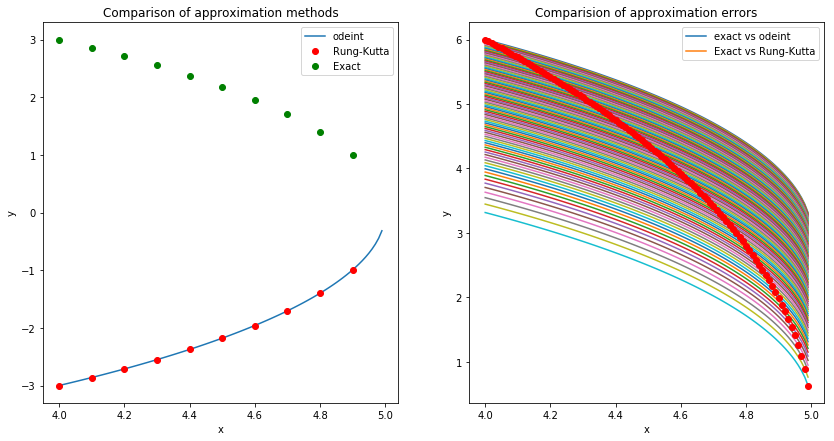

In [45]:
fig = plt.figure(1,figsize=(14,7))

plt.subplot(1,2,1)
plt.plot(x,z_odeint)
plt.plot(x[::10],z_rk_4[::10],"ro")
plt.plot(x[::10],z_actual[::10],"go")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["odeint","Rung-Kutta","Exact"])
plt.title("Comparison of approximation methods")

plt.subplot(1,2,2)
plt.plot(x,abs(z_actual - z_odeint))
plt.plot(x,abs(z_actual - z_rk_4),"ro")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["exact vs odeint","Exact vs Rung-Kutta"])
plt.title("Comparision of approximation errors")
